## 第二次作业--感知机

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


### 获取dummy data

In [2]:
def get_data(n):
    """
    获取dummy data----1.伪随机采样----2.打乱矩阵顺序
    模拟matlab中的dummy_data 函数
    测试代码正确时，使用随机种子0,1,2,3
    """
    #random.seed(0)
    n_positive = random.randint(30, 70)/100
    n_positive = math.floor( n*n_positive )
    n_negative = n - n_positive
    
    def sample(num, xrange, yrange):
        #np.random.seed(2)
        X=  np.random.randint(xrange[0],xrange[1],(num,1))
        #np.random.seed(4)
        Y=  np.random.randint(yrange[0],yrange[1],(num,1))
        rst= np.c_[X,Y]
        return rst
    X_positive = sample(n_positive, [20, 60], [40, 80]);
    X_negative = sample(n_negative, [-30, 40], [-20, 70]);
    X = np.r_[X_positive, X_negative] 
    Y = np.r_[np.ones([n_positive,1]),-1*np.ones([n_negative, 1]) ]
    # 打乱顺序
    #np.random.seed(3)
    per = np.random.permutation(X.shape[0])
    X = X[per,:]
    Y = Y[per,:]
    ### 习惯列向量存储
    X=X.T
    Y=Y.T
    return X,Y

In [3]:
## 测试读取数据
X,Y=get_data(200)
print(X.shape,Y.shape)

(2, 200) (1, 200)


### 看看散点分布

In [4]:
def scattershow(X,Y):
    """
    target：看看初始的分布
    """
    plt.figure(figsize=(8,5))
    cm = plt.cm.get_cmap('RdYlBu') 
    plt.scatter(X[0,:],X[1,:],
               s = 30,
               c = Y[0,:],
               cmap=cm,
               alpha = 0.8,)
    plt.title("scatter distribution")
    plt.grid()
    return

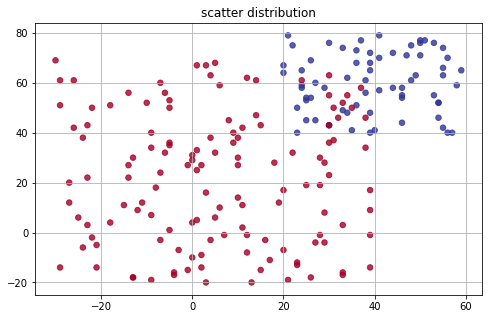

In [5]:
#测试画图
ax1=scattershow(X,Y)

**这是个线性不可分集，普通的感知机算法可能不收敛，所以，主观认为，正确率为92%的分界线可以接受**

### 定义正确率函数

In [6]:
def error(X,Y,w,b):
    """
    target:测试正确率
    参数：X---train ， Y---label，w---权值，b----bias
    return:
        prob_acc:分类的正确率
    """
    temp= np.sign(np.dot(w,X)+b)
    temp= temp-Y
    temp[temp!= 0] = 1
    n1=X.shape[1]
    prob_acc=1-(np.sum(temp)/n1)
    return prob_acc

### 定义感知机算法

In [7]:
def preceptron(train ,label,num_iter=10000 ,eta=0.1):
    """
    target:感知机迭代过程
    参数：
        train:训练集 shape== 2，n
        label:标注集 shape== 1，n
        num_iter: 最大迭代次数
        eta: 学习率
    return：
        ans_w: 学习完的权值矩阵
        ans_b：学习完的bias
        prob_acc: 学习完的正确率
    """
    
    assert train.shape[0]==2
    assert label.shape[0]==1
    assert train.shape[1]== label.shape[1]
    n=train.shape[1]
    ## 初始化w和b
    ans_w=w=np.zeros((1,2) )

    ans_b=b=0
    prob_acc=error(train,label,w,b)
    ###
    for j in range(num_iter):
        for i in range(n):
            if  label[:,i]*(np.dot(w , train[:,i])+b)<=0:
        
                w=w+  eta*label[:,i]*train[:,i]

                b=b+  eta*label[:,i]
                
                prob=error(train,label,w,b)

                if prob>prob_acc:
                    print("目前第%d次迭代正确率为"%j,"%0.4f"%prob)
                    prob_acc=prob
                    ans_w=w
                    ans_b=b
                    if prob_acc>0.92:
                        print("正确率足够了，跳出循环")
                        return prob_acc,ans_w,ans_b
                break 
    return prob_acc,ans_w,ans_b

### 画决策线

In [8]:
def decision(X,Y,W,b):
    # 横轴数据。
    X1 = np.linspace(-30, 60, 5)
    Y1 = np.linspace((-b+W[0][0]*30)/W[0][1], (-b-W[0][0]*60)/W[0][1], 5)

    fig = plt.figure()
    # 画图区域分成1行1列。选择第一块区域。
    ax1 = fig.add_subplot(1,1,1)

    cm = plt.cm.get_cmap('RdYlBu')
    ax1.scatter(X[0,:],X[1,:],s = 30,c = Y[0,:],cmap=cm,alpha = 0.8)
    # 横轴名称。
    ax1.set_xlabel("x1")
    # 纵轴名称。
    ax1.set_ylabel("x2")
    
    # 直线图
    ax1.plot(X1, Y1)
    plt.ylim(-40, 80)
    plt.title("decision line")
    plt.show()


### 实验开始

目前第0次迭代正确率为 0.7050
目前第81次迭代正确率为 0.7100
目前第84次迭代正确率为 0.7200
目前第90次迭代正确率为 0.7600
目前第299次迭代正确率为 0.7800
目前第1133次迭代正确率为 0.8700
目前第1739次迭代正确率为 0.8750
目前第1836次迭代正确率为 0.8800
目前第1959次迭代正确率为 0.8950
目前第2263次迭代正确率为 0.9050
目前第2415次迭代正确率为 0.9100
目前第2482次迭代正确率为 0.9350
正确率足够了，跳出循环


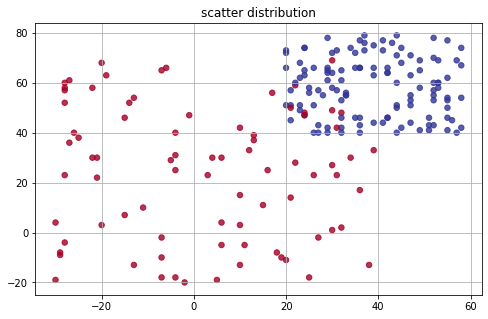

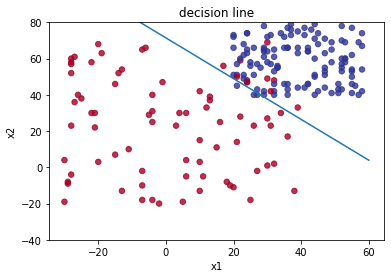

In [17]:
X,Y=get_data(200) ## 每一次都是随机data，可进行多次操作，结果不同
ax1=scattershow(X,Y)
prob,W,b=preceptron(X ,Y,num_iter=10000 ,eta=0.1)
decision(X,Y,W,b)